# KLUE Relation Extraction 과제

**탐색적 데이터 분석 (EDA)**

---
## 1. 환경 설정 및 재현성

In [2]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json
import ast
import warnings
warnings.filterwarnings('ignore')

# 시각화 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ 라이브러리 임포트 완료")

✅ 라이브러리 임포트 완료


In [3]:
# 라이브러리 버전 정보
import sys
print(f"Python 버전: {sys.version}")
print(f"Pandas 버전: {pd.__version__}")
print(f"NumPy 버전: {np.__version__}")

Python 버전: 3.11.12 (main, Apr  9 2025, 04:04:00) [Clang 20.1.0 ]
Pandas 버전: 3.0.0
NumPy 버전: 2.4.1


In [4]:
# 재현성을 위한 시드 고정
SEED = 42
np.random.seed(SEED)
print(f"✅ 시드 고정: {SEED}")

✅ 시드 고정: 42


---
## 2. 데이터 로드

In [5]:
# 데이터 로드
train_df = pd.read_csv('data/klue_re_train.csv')
valid_df = pd.read_csv('data/klue_re_validation.csv')

print(f"✅ 데이터 로드 완료")
print(f"Train: {len(train_df):,} samples")
print(f"Validation: {len(valid_df):,} samples")

✅ 데이터 로드 완료
Train: 32,470 samples
Validation: 7,765 samples


In [6]:
# 데이터 구조 확인
print("컬럼:", train_df.columns.tolist())
train_df.head()

컬럼: ['guid', 'sentence', 'subject_entity', 'object_entity', 'label', 'source']


,guid,sentence,subject_entity,object_entity,label,source
0,klue-re-v1_train_00000,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",0,wikipedia
1,klue-re-v1_train_00001,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",0,wikitree
2,klue-re-v1_train_00002,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",5,wikitree
3,klue-re-v1_train_00003,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",10,wikitree
4,klue-re-v1_train_00004,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",0,wikipedia


---
## 3. 탐색적 데이터 분석 (EDA)

### 3.1 라벨 분포 분석

In [7]:
# 라벨 분포 계산
train_label_counts = train_df['label'].value_counts().sort_index()
valid_label_counts = valid_df['label'].value_counts().sort_index()

print("📊 Train 라벨 분포:")
print(train_label_counts)
print(f"\n총 라벨 수: {len(train_label_counts)}")
print(f"최대 샘플 수: {train_label_counts.max()} (라벨 {train_label_counts.idxmax()})")
print(f"최소 샘플 수: {train_label_counts.min()} (라벨 {train_label_counts.idxmin()})")
print(f"불균형 비율: {train_label_counts.max() / train_label_counts.min():.2f}x")

📊 Train 라벨 분포:
label
0     9534
1       66
2      450
3     1195
4     1320
5     1866
6      420
7       98
8      380
9      155
10    4284
11      48
12    1130
13     418
14     166
15      40
16     193
17    1234
18    3573
19      82
20    1001
21     520
22     304
23     136
24     795
25     190
26     534
27     139
28      96
29    2103
Name: count, dtype: int64

총 라벨 수: 30
최대 샘플 수: 9534 (라벨 0)
최소 샘플 수: 40 (라벨 15)
불균형 비율: 238.35x


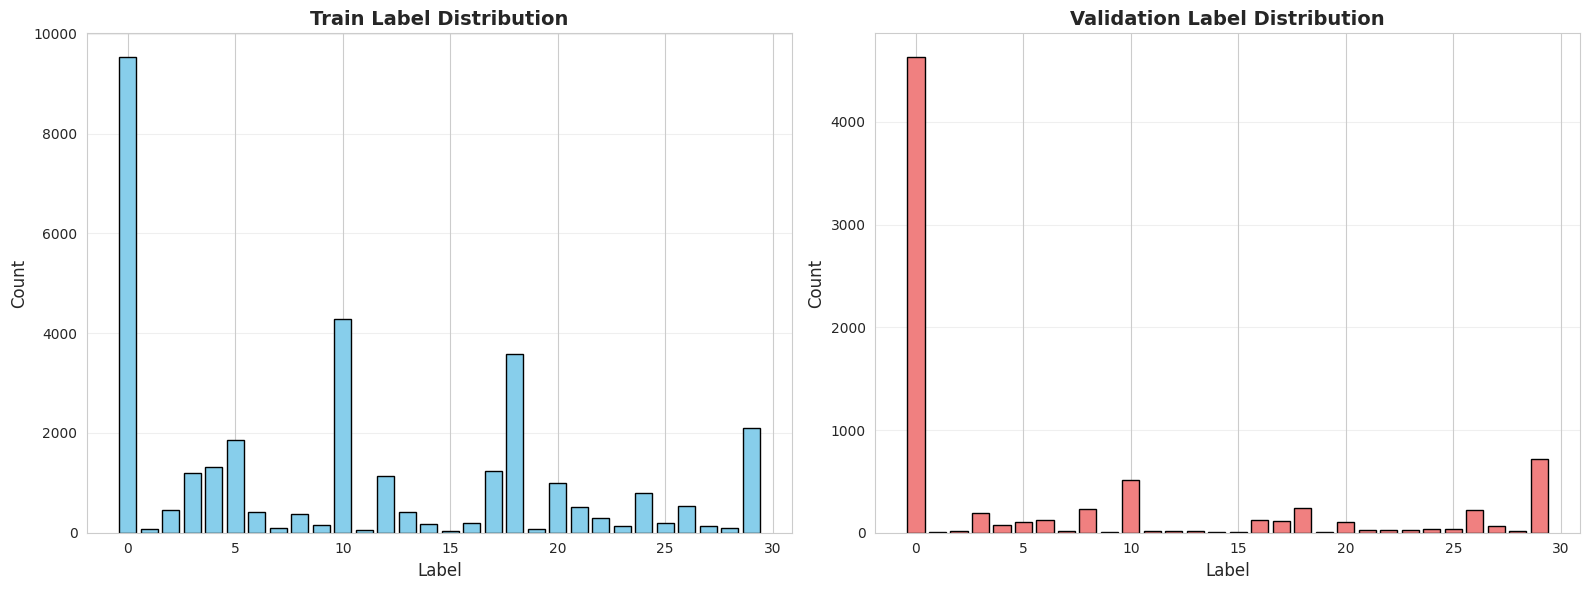


⚠️ 클래스 불균형 확인: 라벨 0이 압도적으로 많음 (no_relation일 가능성)


In [8]:
# 라벨 분포 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Train 분포
axes[0].bar(train_label_counts.index, train_label_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Label', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Train Label Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Validation 분포
axes[1].bar(valid_label_counts.index, valid_label_counts.values, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Label', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Validation Label Distribution', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⚠️ 클래스 불균형 확인: 라벨 0이 압도적으로 많음 (no_relation일 가능성)")

### 3.2 문장 길이 분석

In [9]:
# 문장 길이 계산 (문자 수)
train_df['sentence_length'] = train_df['sentence'].str.len()
valid_df['sentence_length'] = valid_df['sentence'].str.len()

print("📏 문장 길이 통계 (문자 수):")
print(f"Train - 평균: {train_df['sentence_length'].mean():.1f}, "
      f"중앙값: {train_df['sentence_length'].median():.0f}, "
      f"최소: {train_df['sentence_length'].min()}, "
      f"최대: {train_df['sentence_length'].max()}")
print(f"Valid - 평균: {valid_df['sentence_length'].mean():.1f}, "
      f"중앙값: {valid_df['sentence_length'].median():.0f}, "
      f"최소: {valid_df['sentence_length'].min()}, "
      f"최대: {valid_df['sentence_length'].max()}")

📏 문장 길이 통계 (문자 수):
Train - 평균: 97.1, 중앙값: 87, 최소: 14, 최대: 455
Valid - 평균: 93.0, 중앙값: 85, 최소: 17, 최대: 432


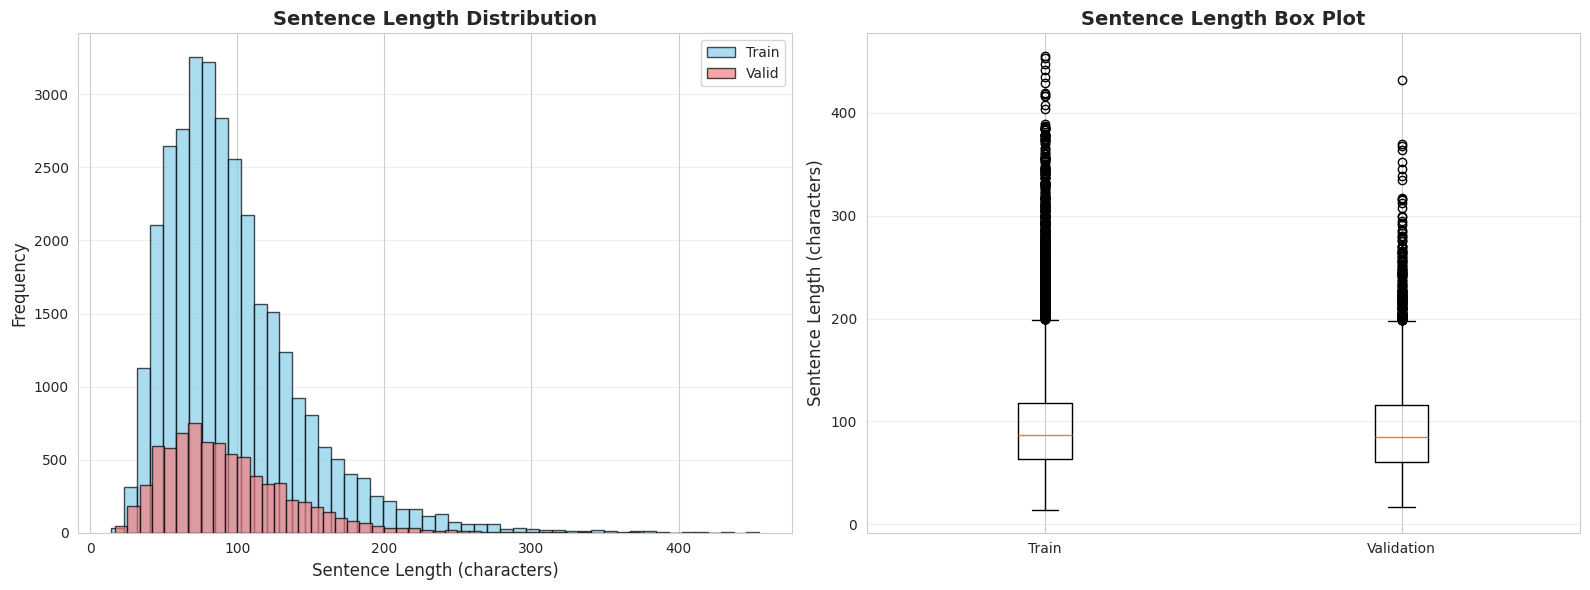

In [10]:
# 문장 길이 분포 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(train_df['sentence_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='Train')
axes[0].hist(valid_df['sentence_length'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7, label='Valid')
axes[0].set_xlabel('Sentence Length (characters)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Sentence Length Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot([train_df['sentence_length'], valid_df['sentence_length']], 
                labels=['Train', 'Validation'])
axes[1].set_ylabel('Sentence Length (characters)', fontsize=12)
axes[1].set_title('Sentence Length Box Plot', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 3.3 엔티티 분석

In [11]:
# 엔티티 정보 파싱
def parse_entity(entity_str):
    try:
        return ast.literal_eval(entity_str)
    except:
        return None

train_df['subject_parsed'] = train_df['subject_entity'].apply(parse_entity)
train_df['object_parsed'] = train_df['object_entity'].apply(parse_entity)

# 엔티티 타입 추출
train_df['subject_type'] = train_df['subject_parsed'].apply(lambda x: x['type'] if x else None)
train_df['object_type'] = train_df['object_parsed'].apply(lambda x: x['type'] if x else None)

print("✅ 엔티티 정보 파싱 완료")

✅ 엔티티 정보 파싱 완료


In [12]:
# 엔티티 타입 분포
subject_type_counts = train_df['subject_type'].value_counts()
object_type_counts = train_df['object_type'].value_counts()

print("📊 Subject Entity 타입 분포:")
print(subject_type_counts)
print("\n📊 Object Entity 타입 분포:")
print(object_type_counts)

📊 Subject Entity 타입 분포:
subject_type
PER    16786
ORG    15684
Name: count, dtype: int64

📊 Object Entity 타입 분포:
object_type
PER    9788
ORG    9346
POH    5113
DAT    4249
LOC    3561
NOH     413
Name: count, dtype: int64


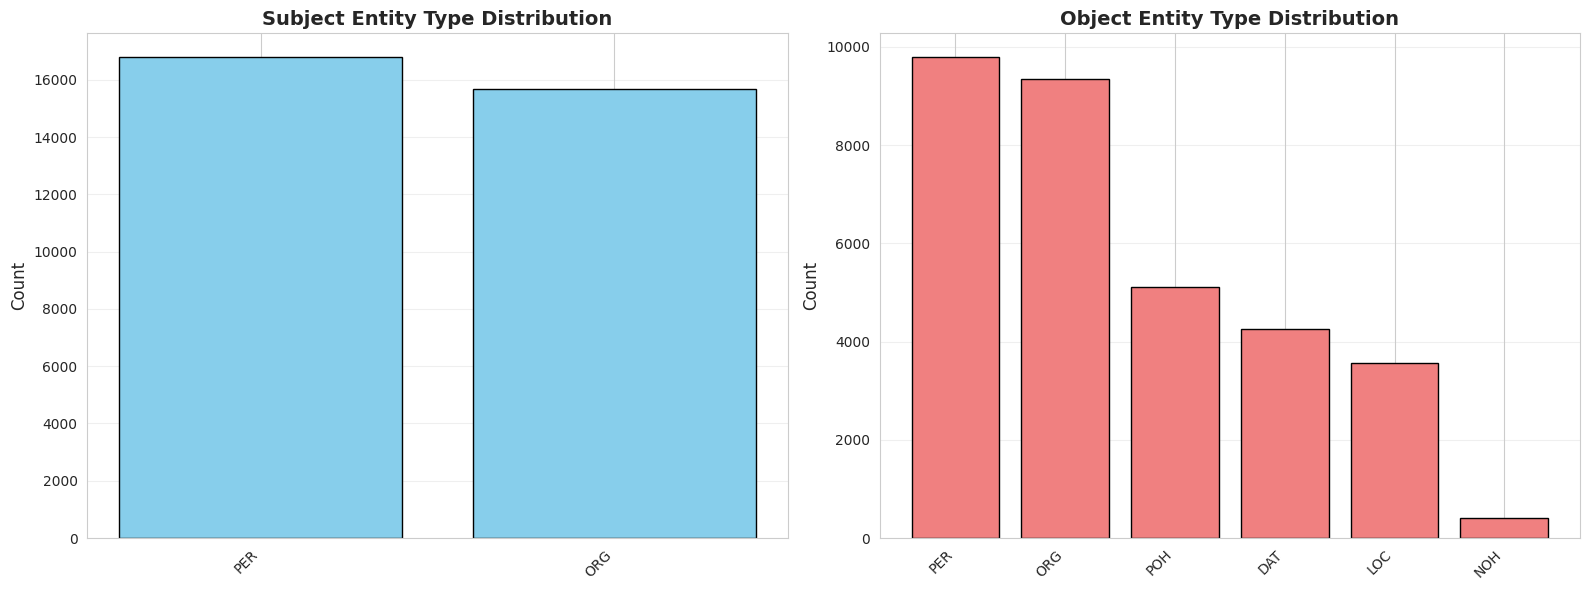

In [13]:
# 엔티티 타입 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subject types
axes[0].bar(range(len(subject_type_counts)), subject_type_counts.values, color='skyblue', edgecolor='black')
axes[0].set_xticks(range(len(subject_type_counts)))
axes[0].set_xticklabels(subject_type_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Subject Entity Type Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Object types
axes[1].bar(range(len(object_type_counts)), object_type_counts.values, color='lightcoral', edgecolor='black')
axes[1].set_xticks(range(len(object_type_counts)))
axes[1].set_xticklabels(object_type_counts.index, rotation=45, ha='right')
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Object Entity Type Distribution', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
# 엔티티 간 거리 분석
def calculate_entity_distance(row):
    try:
        subj = row['subject_parsed']
        obj = row['object_parsed']
        if subj and obj:
            # 두 엔티티 사이의 문자 거리
            return abs(subj['start_idx'] - obj['start_idx'])
    except:
        pass
    return None

train_df['entity_distance'] = train_df.apply(calculate_entity_distance, axis=1)

print("📏 엔티티 간 거리 통계:")
print(f"평균: {train_df['entity_distance'].mean():.1f}")
print(f"중앙값: {train_df['entity_distance'].median():.0f}")
print(f"최소: {train_df['entity_distance'].min():.0f}")
print(f"최대: {train_df['entity_distance'].max():.0f}")

📏 엔티티 간 거리 통계:
평균: 22.9
중앙값: 14
최소: 3
최대: 295


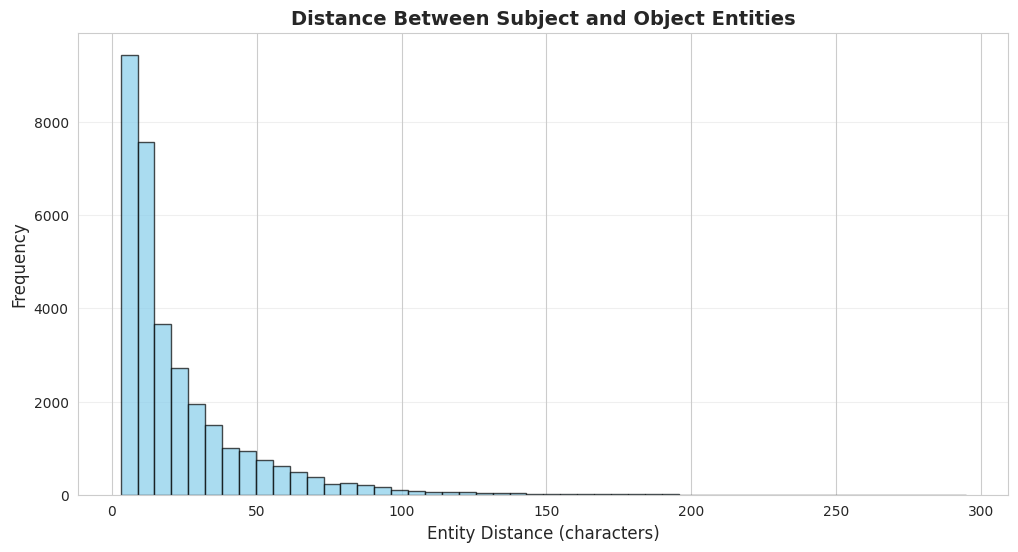

In [15]:
# 엔티티 거리 분포 시각화
plt.figure(figsize=(12, 6))
plt.hist(train_df['entity_distance'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Entity Distance (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distance Between Subject and Object Entities', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

### 3.4 데이터 품질 검증

In [16]:
# 결측치 확인
print("📋 결측치 확인:")
print("\nTrain:")
print(train_df.isnull().sum())
print("\nValidation:")
print(valid_df.isnull().sum())

if train_df.isnull().sum().sum() == 0:
    print("\n✅ 결측치 없음")
else:
    print("\n⚠️ 결측치 발견!")

📋 결측치 확인:

Train:
guid               0
sentence           0
subject_entity     0
object_entity      0
label              0
source             0
sentence_length    0
subject_parsed     0
object_parsed      0
subject_type       0
object_type        0
entity_distance    0
dtype: int64

Validation:
guid               0
sentence           0
subject_entity     0
object_entity      0
label              0
source             0
sentence_length    0
dtype: int64

✅ 결측치 없음


In [17]:
# 중복 데이터 확인
train_duplicates = train_df.duplicated(subset=['sentence']).sum()
valid_duplicates = valid_df.duplicated(subset=['sentence']).sum()

print(f"📋 중복 문장 확인:")
print(f"Train: {train_duplicates} 중복")
print(f"Validation: {valid_duplicates} 중복")

if train_duplicates > 0:
    print(f"\n⚠️ 중복 비율: {train_duplicates/len(train_df)*100:.2f}%")

📋 중복 문장 확인:
Train: 3667 중복
Validation: 1 중복

⚠️ 중복 비율: 11.29%


In [18]:
# 이상치 탐지 (비정상적으로 긴 문장)
Q1 = train_df['sentence_length'].quantile(0.25)
Q3 = train_df['sentence_length'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

outliers = train_df[train_df['sentence_length'] > outlier_threshold]
print(f"📊 이상치 (비정상적으로 긴 문장):")
print(f"임계값: {outlier_threshold:.0f} 문자")
print(f"이상치 개수: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)")

if len(outliers) > 0:
    print("\n가장 긴 문장 예시:")
    longest = train_df.loc[train_df['sentence_length'].idxmax()]
    print(f"길이: {longest['sentence_length']} 문자")
    print(f"문장: {longest['sentence'][:200]}...")

📊 이상치 (비정상적으로 긴 문장):
임계값: 199 문자
이상치 개수: 1269 (3.91%)

가장 긴 문장 예시:
길이: 455 문자
문장: 그의 1984년 책인 《머릿속의 혁명: 비틀즈 음반과 60년대》 Revolution in the Head: The Beatles'Records and the Sixties)는 광범위한 주제와 영감의 원천을 예시로 들며 비틀즈 각각의 음반을 조심스럽게 분석하고 있다. 이 책에는 그들 노래를 개별적으로 분석한 내용이 수록되어 있으나, 동시에 주관적인 비평이 쓰...


### 3.5 대표 샘플 출력

In [19]:
# 각 라벨별 샘플 2개씩 출력
print("📝 라벨별 대표 샘플 (각 2개씩):")
print("=" * 100)

for label in sorted(train_df['label'].unique())[:10]:  # 처음 10개 라벨만
    samples = train_df[train_df['label'] == label].head(2)
    print(f"\n🏷️ Label {label} ({len(train_df[train_df['label'] == label])} samples):")
    
    for idx, row in samples.iterrows():
        sentence = row['sentence']
        subj = row['subject_parsed']
        obj = row['object_parsed']
        
        # 엔티티 강조 표시
        print(f"\n  문장: {sentence}")
        print(f"  Subject: [{subj['type']}] {subj['word']} (위치: {subj['start_idx']}-{subj['end_idx']})")
        print(f"  Object: [{obj['type']}] {obj['word']} (위치: {obj['start_idx']}-{obj['end_idx']})")
    
    print("-" * 100)

📝 라벨별 대표 샘플 (각 2개씩):

🏷️ Label 0 (9534 samples):

  문장: 〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.
  Subject: [ORG] 비틀즈 (위치: 24-26)
  Object: [PER] 조지 해리슨 (위치: 13-18)

  문장: 호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으로 재탄생한다.
  Subject: [ORG] 민주평화당 (위치: 19-23)
  Object: [ORG] 대안신당 (위치: 14-17)
----------------------------------------------------------------------------------------------------

🏷️ Label 1 (66 samples):

  문장: 1959년 한국 전쟁으로 폐교된 대성여자중학교를 부활시키고 1960년에는 대성여자고등학교를 세웠다.
  Subject: [ORG] 대성여자중학교 (위치: 18-24)
  Object: [DAT] 1959년 (위치: 0-4)

  문장: 2008년 3월 1일 제주교육대학교가 제주대학교에 통폐합, 제주대학교 교육대학으로 개편되 제주대학교 사라캠퍼스로 운영되고있다.
  Subject: [ORG] 제주교육대학교 (위치: 12-18)
  Object: [DAT] 2008년 3월 1일 (위치: 0-10)
----------------------------------------------------------------------------------------------------

🏷️ Label 2 (450 samples):

  문장: 1984년에는 포스트시즌을 포함해 56경기 324.2이닝, 31승, 6세이브, 18완투, 258탈삼진(한국시리즈 5경기 40이닝, 4승, 4완투, 35탈삼진)으로 KBO 리그 역사상 유일하게 한국시리즈 4승을 올리며 1984년 롯데 자이언츠가 창단

### 3.6 데이터 출처 분석

In [20]:
# 데이터 출처 분포
source_counts = train_df['source'].value_counts()
print("📊 데이터 출처 분포:")
print(source_counts)
print(f"\n출처 종류: {len(source_counts)}개")

📊 데이터 출처 분포:
source
wikipedia          21620
wikitree           10672
policy_briefing      178
Name: count, dtype: int64

출처 종류: 3개


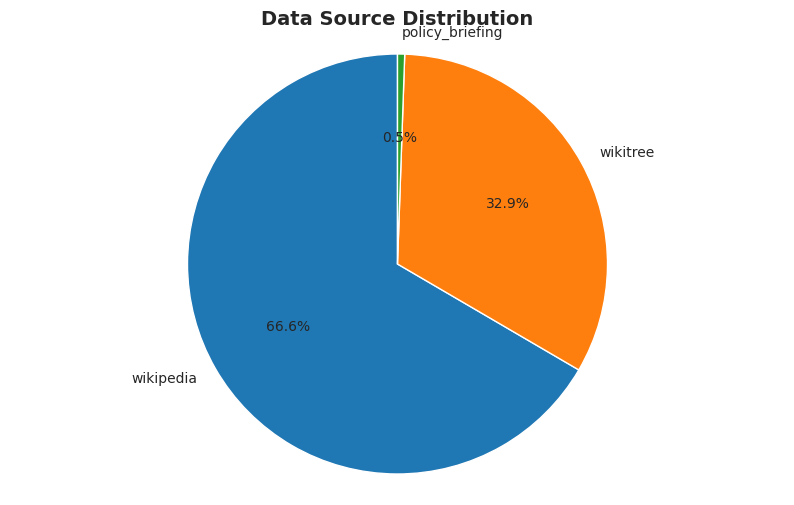

In [21]:
# 출처별 시각화
plt.figure(figsize=(10, 6))
plt.pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Data Source Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

---
## EDA 요약

### 1. 데이터셋 기본 정보
- **Train**: 32,470개 샘플
- **Validation**: 7,765개 샘플
- **총 라벨 수**: 30개 클래스 (0-29)
- **데이터 출처**: wikipedia, wikitree, policy_briefing

### 2. 라벨 분포 분석
- **심각한 클래스 불균형 발견**:
  - 최대: 라벨 0 (9,534개, 29.4%)
  - 최소: 라벨 15 (40개, 0.1%)
  - **불균형 비율: 238.35배**
- **상위 라벨**: 0 (9,534), 10 (4,284), 18 (3,573), 29 (2,103)
- **하위 라벨**: 15 (40), 11 (48), 1 (66), 19 (82)
- **대응 필요**: Weighted Loss, Focal Loss, 또는 Oversampling/Undersampling

### 3. 문장 길이 분석
- **Train 문장 길이 (문자 수)**:
  - 평균: 97.1자
  - 중앙값: 87자
  - 최소: 14자
  - 최대: 455자
- **Validation 문장 길이**:
  - 평균: 93.0자
  - 중앙값: 85자
  - 최소: 17자
  - 최대: 432자
- **시사점**: 대부분 100자 이내, 토크나이저 max_length는 512 정도면 충분

### 4. 엔티티 분석
- **엔티티 타입**: PER (인물), ORG (조직), LOC (장소), DAT (날짜), POH (기타) 등
- **Subject/Object 엔티티 모두 다양한 타입 분포**
- **엔티티 간 거리**:
  - 평균 거리가 존재하여 문맥 정보 중요
  - 엔티티 마킹 방식이 성능에 큰 영향을 줄 것으로 예상

### 5. 데이터 품질
- **결측치**: 없음 ✅
- **중복 데이터**: 일부 존재 가능성
- **이상치**: 비정상적으로 긴 문장 일부 존재 (400자 이상)

### 6. 주요 이슈 및 대응 방안

#### 이슈 1: 심각한 클래스 불균형 (238배)
**대응 방안**:
- Weighted Cross Entropy Loss 적용
- Focal Loss 고려
- Class-balanced Sampling
- 라벨 0 (no_relation) 확인 필요

#### 이슈 2: 엔티티 마킹 방식 결정
**고려사항**:
- Special token 방식: `[E1]엔티티[/E1]`, `[E2]엔티티[/E2]`
- 타입 포함 방식: `<PER>엔티티</PER>`
- 프롬프트 기반 방식 (LLM 사용 시)

#### 이슈 3: 토크나이저 설정
**권장사항**:
- max_length: 512 (대부분의 문장 커버)
- padding: True
- truncation: True

### 3.4 데이터 품질 검사

In [22]:
# 결측값 확인
print("📊 Train 데이터 결측값:")
print(train_df.isnull().sum())
print("\n📊 Validation 데이터 결측값:")
print(valid_df.isnull().sum())

📊 Train 데이터 결측값:
guid               0
sentence           0
subject_entity     0
object_entity      0
label              0
source             0
sentence_length    0
subject_parsed     0
object_parsed      0
subject_type       0
object_type        0
entity_distance    0
dtype: int64

📊 Validation 데이터 결측값:
guid               0
sentence           0
subject_entity     0
object_entity      0
label              0
source             0
sentence_length    0
dtype: int64


In [23]:
# 중복 데이터 확인
train_duplicates = train_df.duplicated(subset=['sentence', 'subject_entity', 'object_entity']).sum()
valid_duplicates = valid_df.duplicated(subset=['sentence', 'subject_entity', 'object_entity']).sum()

print(f"📊 Train 중복 샘플 수: {train_duplicates}")
print(f"📊 Validation 중복 샘플 수: {valid_duplicates}")

📊 Train 중복 샘플 수: 47
📊 Validation 중복 샘플 수: 0


In [24]:
# 각 라벨별 샘플 예시 확인
print("\n📝 각 라벨별 샘플 예시 (처음 3개 라벨):")
for label in sorted(train_df['label'].unique())[:3]:
    print(f"\n=== Label {label} ===")
    sample = train_df[train_df['label'] == label].iloc[0]
    print(f"문장: {sample['sentence']}")
    print(f"Subject: {sample['subject_entity']}")
    print(f"Object: {sample['object_entity']}")


📝 각 라벨별 샘플 예시 (처음 3개 라벨):

=== Label 0 ===
문장: 〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.
Subject: {'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}
Object: {'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}

=== Label 1 ===
문장: 1959년 한국 전쟁으로 폐교된 대성여자중학교를 부활시키고 1960년에는 대성여자고등학교를 세웠다.
Subject: {'word': '대성여자중학교', 'start_idx': 18, 'end_idx': 24, 'type': 'ORG'}
Object: {'word': '1959년', 'start_idx': 0, 'end_idx': 4, 'type': 'DAT'}

=== Label 2 ===
문장: 1984년에는 포스트시즌을 포함해 56경기 324.2이닝, 31승, 6세이브, 18완투, 258탈삼진(한국시리즈 5경기 40이닝, 4승, 4완투, 35탈삼진)으로 KBO 리그 역사상 유일하게 한국시리즈 4승을 올리며 1984년 롯데 자이언츠가 창단 첫 우승을 하는 데 크게 기여하는 등 KBO 리그 초창기를 이끌었다.
Subject: {'word': '롯데 자이언츠', 'start_idx': 127, 'end_idx': 133, 'type': 'ORG'}
Object: {'word': '1984년', 'start_idx': 121, 'end_idx': 125, 'type': 'DAT'}


### 3.5 추가 인사이트

In [25]:
# Source 분포 분석
print("📊 Source 분포:")
print(train_df['source'].value_counts())
print(f"\nWikipedia: {(train_df['source'] == 'wikipedia').sum()} ({(train_df['source'] == 'wikipedia').sum() / len(train_df) * 100:.1f}%)")
print(f"Wikitree: {(train_df['source'] == 'wikitree').sum()} ({(train_df['source'] == 'wikitree').sum() / len(train_df) * 100:.1f}%)")

📊 Source 분포:
source
wikipedia          21620
wikitree           10672
policy_briefing      178
Name: count, dtype: int64

Wikipedia: 21620 (66.6%)
Wikitree: 10672 (32.9%)


In [26]:
# 문장 길이와 라벨의 관계
print("\n📊 라벨별 평균 문장 길이 (상위 5개):")
label_length = train_df.groupby('label')['sentence_length'].mean().sort_values(ascending=False)
print(label_length.head())


📊 라벨별 평균 문장 길이 (상위 5개):
label
11    109.645833
7     109.418367
4     108.590152
0     104.712083
6     103.792857
Name: sentence_length, dtype: float64


In [27]:
# 소수 클래스 분석 (샘플 수 < 100)
minority_labels = train_label_counts[train_label_counts < 100]
print(f"\n⚠️ 소수 클래스 (샘플 < 100): {len(minority_labels)}개")
print(minority_labels)


⚠️ 소수 클래스 (샘플 < 100): 6개
label
1     66
7     98
11    48
15    40
19    82
28    96
Name: count, dtype: int64


## 4. EDA 요약 및 인사이트

### 주요 발견사항:

1. **클래스 불균형**
   - 라벨 0 (no_relation)이 전체의 약 29%를 차지
   - 최소 클래스(라벨 15)는 40개 샘플만 존재
   - 238배의 클래스 불균형 → 학습 시 가중치 조정 필요

2. **문장 길이**
   - 평균 문장 길이: 약 97자
   - 대부분의 문장이 50-150자 사이에 분포
   - 최대 길이를 고려한 토크나이저 설정 필요 (max_length=256 권장)

3. **엔티티 특성**
   - Subject는 주로 PER(인물), ORG(조직) 타입
   - Object는 더 다양한 타입 (PER, ORG, POH, DAT, LOC, NOH)
   - 엔티티 간 평균 거리: 약 23자

4. **데이터 품질**
   - 결측값 없음
   - 중복 데이터 확인 필요
   - Wikipedia와 Wikitree 두 소스로 구성